<a href="https://www.kaggle.com/code/smndey/twitter-sentiment-analysis-from-scratch?scriptVersionId=134586559" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Pathway+Extreme:wght@500&display=swap" rel="stylesheet">

# Sentiment Analysis using Ann

<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
Sentiment analysis, also known as opinion mining, is a powerful technique that allows us to gain insights into public opinion and emotions expressed in text data. With the rise of social media platforms, such as Twitter, sentiment analysis has become an essential tool for understanding the sentiments and attitudes of individuals towards various topics.
</p>
    
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
In this project, we leverage the capabilities of the Natural Language Toolkit (NLTK) library and Artificial Neural Networks (ANN) to perform sentiment analysis on a Twitter dataset. Twitter, being a popular microblogging platform, provides a rich source of real-time data containing diverse opinions and sentiments expressed by users across the globe.
</p>
    
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
The primary objective of this project is to develop a robust sentiment analysis model capable of accurately classifying tweets into positive and negative sentiment categories. By utilizing the power of ANN, we aim to build a predictive model that can effectively learn patterns and relationships in the textual data, enabling it to make accurate predictions on unseen tweets.
To achieve this goal, we first preprocess the Twitter dataset by removing noise, such as special characters, hashtags, and URLs. We then employ NLTK's extensive collection of text processing functionalities, including tokenization, stemming, and stop-word removal, to transform the raw textual data into a structured format suitable for analysis.
</p>
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
Next, we design and train an ANN model using the preprocessed dataset. Artificial Neural Networks are widely recognized for their ability to learn complex patterns in data and are well-suited for sentiment analysis tasks. By leveraging a combination of input, hidden, and output layers, the ANN model can effectively capture the underlying sentiment dynamics present in the tweet dataset.
</p>
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
Once the model is trained, we evaluate its performance using accuracy metric. This evaluation allows us to gauge the effectiveness of our sentiment analysis model in correctly predicting sentiment labels for tweets.
</p>

<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
Overall, this project demonstrates the power of combining natural language processing techniques from NLTK with the learning capabilities of ANN to perform sentiment analysis on Twitter data. 
    
</p>

# Table of Content
- #### [Importing Libraries](#1)
- #### [Downloading twitter data](#2)
- #### [Visualizing the Data](#3)
- #### [Sentiment Analysis Class](#4)
- #### [Train and Test data preparation](#5)
- #### [Training the Ann model and checking Accuracy](#6)
- #### [Making Prediction](#7)


<a id =1></a>
# Importing Libraries
#### Library Used 
#### ``` nltk , matplotlib , random , re , string , numpy ```
```
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random  
import re                                  # library for regular expression operations
import string                              # for string operations
import numpy as np
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

```

In [1]:
#importing libraries
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random  

import re                                  # library for regular expression operations
import string                              # for string operations
import numpy as np
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id =2></a>
# Downloading Twitter Data
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
 A coupus of tweets were downloaded from NLTK. There are 10000 samples of tweets. Among them 5000 are positive tweets and 5000 are negative tweets. After downloaded tweets were divided into positive and negative tweets </p>

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

# download the stopwords from NLTK
nltk.download('stopwords')

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Error loading twitter_samples: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


<a id =3></a>
# Visualizing the Data
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
Then a pie chart was drawn . The pie diagram indicates that 50% of the tweets are positive and other 50% are negative.</p>

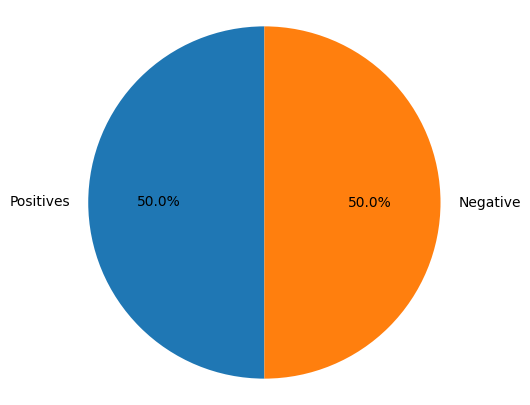

In [3]:
# Declare a figure with a custom size
fig= plt.figure(figsize=(5,5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

<a id =4></a>
# Sentiment Analysis Class

 The `Sentiment_Analysis` class is a Python class that provides methods for sentiment analysis using a Twitter dataset. It leverages the Natural Language Toolkit (NLTK) library and an Artificial Neural Network (ANN) model to perform sentiment analysis and predict whether a given tweet expresses positive or negative sentiment.

## Methods

### 1. `process_tweet(tweet)`

 This method takes a single tweet as input and performs various preprocessing steps to remove noise from the text. It removes punctuation, stop words, hyperlinks, and other unnecessary elements. Then, it tokenizes the tweet by splitting it into individual words and returns a cleaned tweet. 

### 2. `frequency_dic(tweet, label)`

 This method takes a list of tweets as input along with their corresponding labels (0 for negative sentiment, 1 for positive sentiment). It creates a dictionary called `freq`, where each word is a key, and the value is a NumPy array representing the occurrence of that word in positive and negative tweets. The array has two elements: the count of occurrences in positive tweets and the count of occurrences in negative tweets. This method returns the `freq` dictionary.

### 3. `extract_feature(tweet, freq)`

 Given a single tweet and the `freq` dictionary as input, this method preprocesses the tweet using the `process_tweet()` method. It then utilizes the `freq` dictionary to create a feature matrix for the tweet of shape (1, 3). The elements in this matrix are as follows: [bias = 0, total positive occurrences, total negative occurrences]. The method returns this feature matrix.

### 4. `create_input_feature(tweets)`

 This method takes a list of tweets as input and uses the `extract_feature()` method to create input features for each tweet. It generates the input feature matrix for both training and test samples and returns the resulting input features.

### 5. `train(train_tweets, train_labels, test_tweets, test_labels, batch_size, lr, iterations, ann)`

 The `train()` method is responsible for training the sentiment analysis model. It takes the training tweets, training labels, test tweets, test labels, batch size, learning rate (lr), iterations, and the ANN model as inputs. It calls the `train()` method of the ANN model and trains the actual sentiment analysis model using the provided parameters.

### 6. `predict(tweets,labels=optional)`

 After training the model, the `predict()` method is used to predict the sentiment (positive or negative) of a list of tweets. It takes the list of tweets as input and returns a list of predictions, indicating whether each tweet expresses positive or negative sentiment.
 **Note:If accuracy is necessary from the predict function, then the lables must be given a value. But if only the prediction value is desired not the accuracy then lable can be set to 0**

In [4]:

class Sentiment_Analysis:
    def __init__(self):
        self.freq={}

    def process_tweet(self,tweet):
        '''
        input:
            tweet: a tweet to be processed

        output: 
            cleaned_tweet: a list of tokenized words from the tweet after removing punctuations,stopword,applying stemming and tokenizing etc
        '''

        # instantiate tokenizer class
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)

        #Import the english stop words list from NLTK
        english_stopwords = stopwords.words('english') 
        # remove hyperlinks
        tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
        # remove old style retweet text "RT"
        tweet = re.sub(r'^RT[\s]+', '', tweet)
        # remove hashtags
        # only removing the hash # sign from the word
        tweet = re.sub(r'#', '', tweet)

        # tokenize tweets
        tweet = tokenizer.tokenize(tweet)

        cleaned_tweet=[]
        for word in tweet:
            if word not in english_stopwords and word not in string.punctuation:
                cleaned_tweet.append(word)

        return cleaned_tweet


    def frequency_dic(self,tweets,label):
        '''
        input:
            tweets: a list of tweets
            label : a list of labels(0,1) of the corresponding tweets

        output:
            freq: a dictionary{key:word, value:np.array([positive_count,negative_count])}
        '''
        freq={}
        
        for tweet,y in zip(tweets,np.squeeze(label)):
            for word in self.process_tweet(tweet):
                
                freq[word]= freq.get(word,0)+np.array([1,0]) if y==1 else freq.get(word,0)+np.array([0,1])

        return freq


    def extract_feature(self,tweet,freq):
        '''
            input:
                tweet: a tweet
                freq: frequency matrix

            output:
                X: an array of shape(3,1), X=[bias=0,positive_count,negative_count]
        '''
        X=[0]*3
        for word in self.process_tweet(tweet):
            X[1] += freq.get(word,[0,0])[0]
            X[2] += freq.get(word,[0,0])[1]

        return np.array(X).reshape(3,1)
    
    def create_input_feature(self,tweets):
        '''
            input:
                tweets: a list of tweets
            output:
                return the input features of the tweets (x=[bias=0,pos_freq,neg_freq])
                 
        '''
        # add a column of zeros
        input_features=np.zeros((3,1))
        
        for tweet in tweets:
            input_features= np.append(input_features,self.extract_feature(tweet,self.freq),axis=1)
    
        #remove the column of zeros and return it
        return input_features[:,1:]
    
    def train(self,train_tweets,train_labels,test_tweets,test_label,batch_size,lr,iterations,ann):
        '''
            input:
                tweets: a list of tweets
                labels: label of the corresponding tweet (0/1)
                ann:      ann model
        '''
        self.freq=self.frequency_dic(train_tweets,train_labels)
        

        train_features= self.create_input_feature(train_tweets)*1e-3
        test_features= self.create_input_feature(test_tweets)*1e-3
        
 
        ann.train(train_features,train_label,batch_size,test_features,test_label,lr,iterations,[True,True])
        

    def predict(self,tweets,labels=0):
        '''
            input:
                tweets: a list of tweet
                labels: labels of the tweets (0/1)
                NOTE: The label parameter is not necessary , while predicting custom tweets. It is only usefull when we have the label
                for the tweets and we want to know the accuracy of the prediction. By default it is set to 0
                
            output:
                returns  the accuracy and actual output
        '''
        if labels==0:
            labels= np.zeros((1,len(tweets)))
        return ann.predict(self.create_input_feature(tweets)*1e-3,labels,batch_size=100,train=False)
        
        
        
        
        
        




<a id =5></a>
# Train and Test data preparation
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
8000 tweets are taken as input data , 4000 tweets from each positive and negative tweets. And 2000 tweets are taken as test data , 1000 from each.
</p>

In [5]:
#creating training and test set
tweet= all_positive_tweets+all_negative_tweets
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

train_tweets= tweet[:4000]+tweet[5000:9000]
test_tweets= tweet[4000:5000]+tweet[9000:10000]

train_label= np.array(list(labels[:4000])+list(labels[5000:9000]))
test_label=np.array(list(labels[4000:5000])+list(labels[9000:10000]))

train_label= train_label.reshape(1,train_label.size)
test_label= test_label.reshape(1,test_label.size)

<a id =6></a>
# Training The Ann model and Checking The Accuracy
<p style="font-family: Pathway Extreme, sans-serif; font-size:16px">
The ann model is trained using the train data and the test data are also given to get the accuracy on the test data.
</p>

```
Parameter:

lr= .1
batch_size=20
iterations=20
neurons: [10,1] -> 10 in the first layer and 1 in the second.
activation: sigmoid in both layer
After training :
training_accuracy:99.25% and test accuracy:99.35%
```

In [6]:
from artificial_neural_network import Ann

#setting the seed , to reproduce the result
random.seed(42) 

ann = Ann([10,1],['sigmoid','sigmoid'],_type='binary_classification')
s=Sentiment_Analysis()
s.train(train_tweets,train_label,test_tweets,test_label,batch_size=20,lr=.1,iterations=20,ann=ann)


iter:0 - train_cost:22.94 - train_acc:85.69 - test_acc:84.75
iter:1 - train_cost:22.69 - train_acc:88.01 - test_acc:86.95
iter:2 - train_cost:17.93 - train_acc:97.42 - test_acc:96.5
iter:3 - train_cost:15.32 - train_acc:98.08 - test_acc:97.75
iter:4 - train_cost:13.61 - train_acc:98.21 - test_acc:97.9
iter:5 - train_cost:12.39 - train_acc:98.26 - test_acc:98.0
iter:6 - train_cost:11.47 - train_acc:98.3 - test_acc:98.0
iter:7 - train_cost:10.76 - train_acc:98.34 - test_acc:98.05
iter:8 - train_cost:10.2 - train_acc:98.36 - test_acc:98.1
iter:9 - train_cost:9.75 - train_acc:98.42 - test_acc:98.1
iter:10 - train_cost:9.38 - train_acc:98.49 - test_acc:98.2
iter:11 - train_cost:9.07 - train_acc:98.54 - test_acc:98.35
iter:12 - train_cost:8.81 - train_acc:98.62 - test_acc:98.4
iter:13 - train_cost:8.59 - train_acc:98.69 - test_acc:98.6
iter:14 - train_cost:8.41 - train_acc:98.91 - test_acc:98.75
iter:15 - train_cost:8.24 - train_acc:99.06 - test_acc:99.1
iter:16 - train_cost:8.1 - train_acc:

<a id =7></a>
# Making Predictions
Now using the `predict` method from `Sentiment_Analysis` class any tweet can be classfied into positive or negative. If the value is more than 0.5 , then the tweet is more likely to be positive and  Negative otherwise.

In [7]:


p= s.predict(['god help him '])
print(p[1])

[[0.3237042]]
